# W12 W Activity: Challenge

**Goal**: Take a data set and create a butterfly plot.

**Actions**:

1. Import the `tips` data set from Seaborn.
2. Create new feature called `tip_pct` where $tip\_pct = \Large \frac{tip}{total\_bill} \times 100$ 
3. Create a table that shows the mean value of the features `tip_pct`, `total_bill`, and `size` grouped by `sex`. It should have the domain of `sex` along axis 0 and the feature names along axis 1.
4. Use the included `butterflyplot` function to plot a transposed version of the table, i.e. the input table should have columns for the domain of `sex`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def butterflyplot(X, title=None):

    L, R = X.columns.tolist()

    # Define figure parameters
    fig = plt.figure(figsize=(10, len(X)/2 + 1))
    
    # Create an axes to draw on
    ax = plt.subplot()
        
    # Plot the bars, flipping the left with negation
    ax.barh(y=X.index, width=-X[L], alpha=.75, color='lightblue', label=L)
    ax.barh(y=X.index, width=X[R], alpha=.75, label=R)
    
    # Create individual bar text labels
    text_props = {'c': 'gray', 'va': 'center'}
    for y in X.index:
        x1 = X.loc[y, L]
        x2 = X.loc[y, R]
        x1_label = str(round(x1))
        x2_label = str(round(x2))
        ax.text(-(x1 + .01 * len(x1_label)), y, x1_label, **text_props)
        ax.text(+x2, y, x2_label, **text_props)
    
    plt.legend(frameon=False)
    
    # Reduce ink
    sns.despine(left=True, bottom=True)
    ax.set_xticks([])
    ax.grid(axis='y', color='#F0F0F0', ls='--')

    if title:
        plt.title(title)

    return ax

In [3]:
TIPS = sns.load_dataset('tips')

In [4]:
TIPS['tip_pct'] = TIPS['tip'] / TIPS['total_bill'] * 100

In [8]:
summary_table = TIPS.groupby('sex', observed=False)[['tip_pct', 'total_bill', 'size']].mean()
summary_table

,tip_pct,total_bill,size
sex,,,
Male,15.765055,20.744076,2.630573
Female,16.649074,18.056897,2.459770


<Axes: title={'center': 'Feature Comparison by Gender'}>

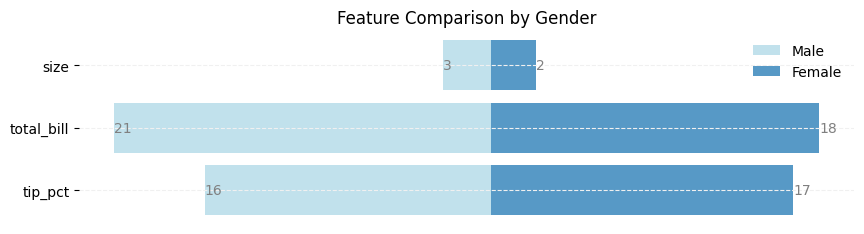

In [9]:
butterflyplot(summary_table.T, title='Feature Comparison by Gender')